In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import praw

reddit = praw.Reddit(client_id='KgFBUmRPl1whtw',
                     client_secret='gmOJmuS3iDRwrUnhmn0CYtpnGGY',
                     user_agent='LearnDataSci')

In [5]:
headlines = set()


In [6]:
for submission in reddit.subreddit('science').new(limit = None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

891


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)


[{'compound': 0.7783,
  'headline': 'Research conducts experiment that recreates transmission of political values and '
              'observation of efect of politically homogeneous social contexts on political value '
              'endorsements, finds political values are socially reinforced and a result of social '
              'influence',
  'neg': 0.0,
  'neu': 0.794,
  'pos': 0.206},
 {'compound': -0.5267,
  'headline': 'Resurgence of Vaccine-Preventable Diseases in Venezuela as a Regional Public Health '
              'Threat in the Americas',
  'neg': 0.207,
  'neu': 0.793,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'New Study Says We Can Prime Our Brains to Learn While We Sleep. Scientists have '
              'shown that the brain’s channels for learning are also open during sleep.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.7783,Research conducts experiment that recreates tr...,0.000,0.794,0.206
1,-0.5267,Resurgence of Vaccine-Preventable Diseases in ...,0.207,0.793,0.000
2,0.0000,New Study Says We Can Prime Our Brains to Lear...,0.000,1.000,0.000
3,0.5574,Scientists have found novel IL-2 mimics which ...,0.000,0.796,0.204
4,-0.8402,Climate stress drove wave of Arab Spring refug...,0.293,0.663,0.044


In [9]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.7783,Research conducts experiment that recreates tr...,0.000,0.794,0.206,1
1,-0.5267,Resurgence of Vaccine-Preventable Diseases in ...,0.207,0.793,0.000,-1
2,0.0000,New Study Says We Can Prime Our Brains to Lear...,0.000,1.000,0.000,0
3,0.5574,Scientists have found novel IL-2 mimics which ...,0.000,0.796,0.204,1
4,-0.8402,Climate stress drove wave of Arab Spring refug...,0.293,0.663,0.044,-1


In [10]:
df.label.value_counts()

 0    366
 1    275
-1    250
Name: label, dtype: int64

In [11]:
df.label.value_counts(normalize=True) * 100

 0    41.077441
 1    30.864198
-1    28.058361
Name: label, dtype: float64

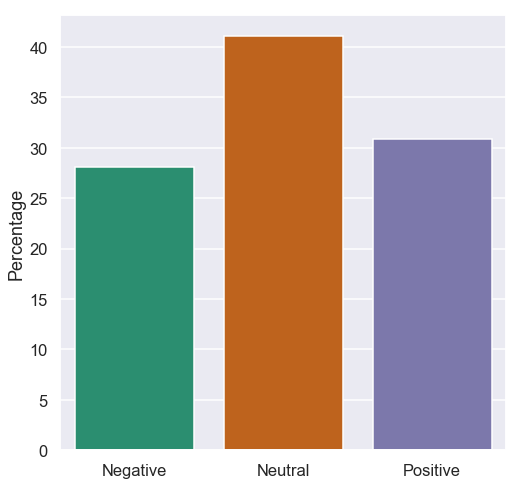

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [16]:

from nltk.tokenize import word_tokenize, RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')


def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [17]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('new', 78),
 ('study', 66),
 ('scientists', 36),
 ('researchers', 34),
 ('could', 29),
 ('found', 28),
 ('may', 27),
 ('research', 24),
 ('like', 24),
 ('energy', 19),
 ('better', 17),
 ('people', 17),
 ('human', 17),
 ('disease', 16),
 ('finds', 15),
 ('time', 15),
 ('light', 15),
 ('according', 15),
 ('years', 15),
 ('shows', 14)]

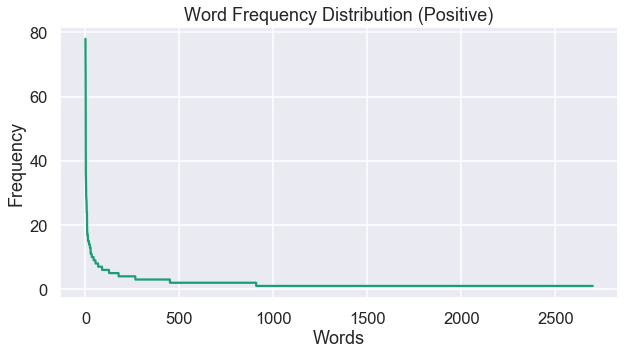

In [18]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

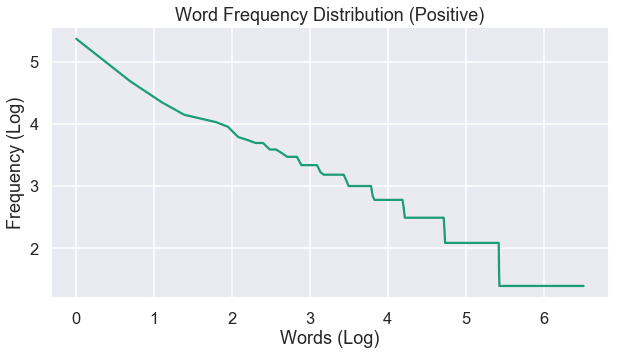

In [19]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [21]:

neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)


[('study', 74),
 ('new', 67),
 ('cancer', 41),
 ('people', 35),
 ('research', 29),
 ('risk', 27),
 ('scientists', 23),
 ('finds', 22),
 ('found', 21),
 ('likely', 20),
 ('cells', 20),
 ('researchers', 20),
 ('brain', 19),
 ('associated', 18),
 ('may', 18),
 ('health', 17),
 ('suggests', 17),
 ('disease', 17),
 ('according', 16),
 ('use', 15)]

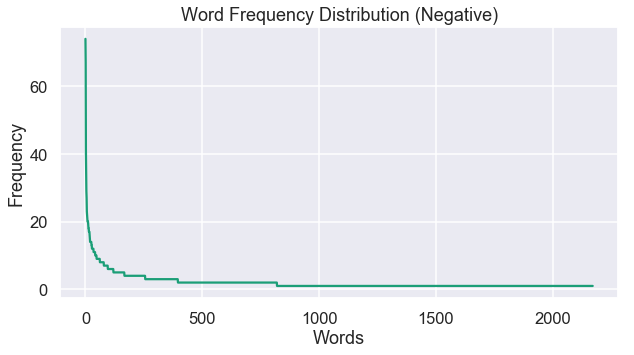

In [22]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

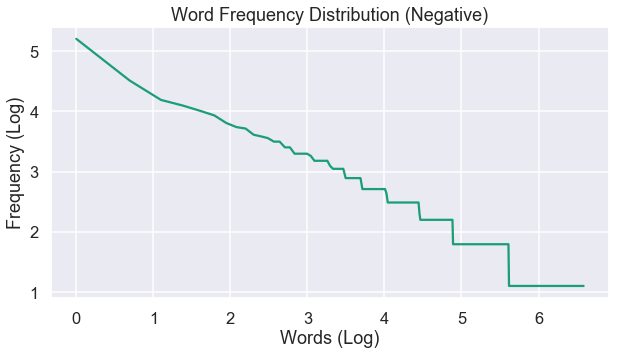

In [23]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()